Case Study: "Underwriter for a Day"

Tejas Bajaj 11308438

Haotong Sun 11337172

Yilun Yang 11313432 


#  Risk Group Assignment Algorithm: Develop an algorithm for categorizing new applicants into specific risk groups based on their individual characterisEcs.

In [294]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [295]:
# Load your dataset
claim_data = pd.read_csv('claim_data_group5_2024.csv')

In [296]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDpol        100000 non-null  float64
 1   ClaimNb      100000 non-null  float64
 2   Exposure     100000 non-null  float64
 3   Area         100000 non-null  object 
 4   VehPower     100000 non-null  float64
 5   VehAge       100000 non-null  float64
 6   DrivAge      100000 non-null  float64
 7   BonusMalus   100000 non-null  float64
 8   VehBrand     100000 non-null  object 
 9   VehGas       100000 non-null  object 
 10  Density      100000 non-null  float64
 11  Region       100000 non-null  object 
 12  ClaimAmount  100000 non-null  float64
dtypes: float64(9), object(4)
memory usage: 9.9+ MB


In [297]:
claim_data

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,2271893.0,0.0,0.83,E,5.0,17.0,53.0,64.0,B2,Diesel,3317.0,R93,0.0
1,1111864.0,0.0,0.24,E,5.0,2.0,27.0,64.0,B3,Diesel,2740.0,R22,0.0
2,72908.0,0.0,0.50,E,7.0,11.0,67.0,50.0,B3,Regular,4762.0,R93,0.0
3,2283027.0,0.0,0.08,B,5.0,8.0,28.0,60.0,B1,Diesel,64.0,R91,0.0
4,1123838.0,0.0,0.03,A,11.0,1.0,38.0,50.0,B2,Regular,16.0,R24,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,70445.0,0.0,1.00,C,5.0,11.0,37.0,56.0,B2,Diesel,317.0,R82,0.0
99996,4163362.0,0.0,0.22,E,6.0,13.0,58.0,50.0,B1,Diesel,4762.0,R93,0.0
99997,2081912.0,0.0,1.00,E,5.0,1.0,49.0,50.0,B2,Diesel,4998.0,R11,0.0
99998,2012998.0,0.0,0.71,D,9.0,9.0,36.0,54.0,B1,Regular,1541.0,R91,0.0


In [298]:
# Descriptive Statistics for Numerical Columns
descriptive_stats = claim_data.describe()
descriptive_stats

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,ClaimAmount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2.617735e+06,0.039020,0.528057,6.460230,6.992550,45.483040,59.822980,1800.69569,76.599887
std,1.643394e+06,0.206296,0.364232,2.055641,5.637297,14.154698,15.652541,3955.08311,1531.841302
min,1.500000e+01,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,2.00000,0.000000
25%,1.156127e+06,0.000000,0.170000,5.000000,2.000000,34.000000,50.000000,94.00000,0.000000
50%,2.271008e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,399.00000,0.000000
75%,4.044791e+06,0.000000,0.990000,7.000000,11.000000,55.000000,65.000000,1658.00000,0.000000
max,6.114324e+06,4.000000,1.000000,15.000000,100.000000,99.000000,230.000000,27000.00000,200000.000000


In [299]:
# Analyzing unique values for categorical columns
categorical_overview = {
    "Area": claim_data["Area"].nunique(),
    "VehBrand": claim_data["VehBrand"].nunique(),
    "VehGas": claim_data["VehGas"].unique(),
    "Region": claim_data["Region"].nunique()
}
categorical_overview

{'Area': 6,
 'VehBrand': 11,
 'VehGas': array(['Diesel', 'Regular'], dtype=object),
 'Region': 22}

In [300]:
# Distribution of Individual Claims (ClaimNb)
claim_distribution = claim_data['ClaimNb'].value_counts()
claim_distribution

ClaimNb
0.0    96335
1.0     3441
2.0      214
3.0        7
4.0        3
Name: count, dtype: int64

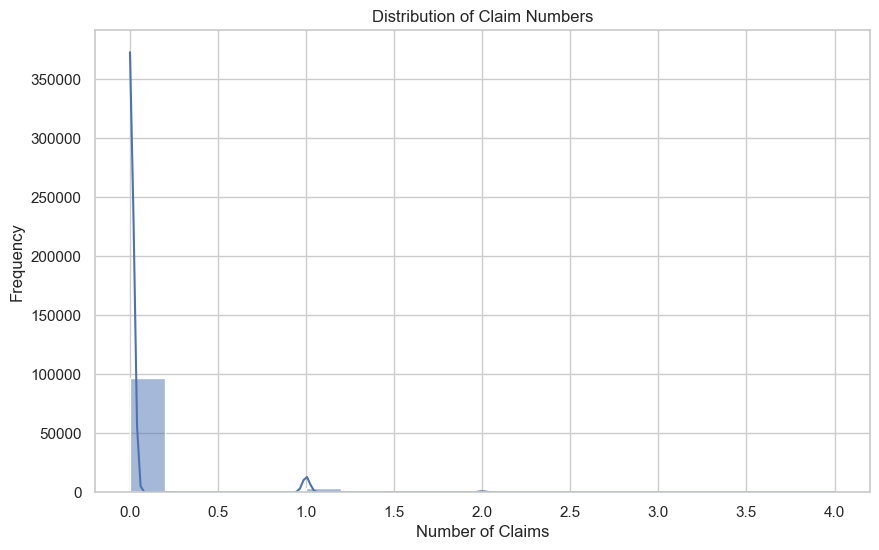

In [301]:
plt.figure(figsize=(10, 6))
sns.histplot(claim_data['ClaimNb'], bins=20, kde=True).set_title('Distribution of Claim Numbers')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.show()

In [302]:
# Distribution of Claim Amounts (ClaimAmount)
claim_amount_distribution = claim_data['ClaimAmount'].value_counts()
claim_amount_distribution

ClaimAmount
0.00       96335
1204.00      649
1128.12      398
1172.00      282
1128.00       96
           ...  
2487.55        1
1307.64        1
1858.81        1
741.77         1
1117.64        1
Name: count, Length: 1938, dtype: int64

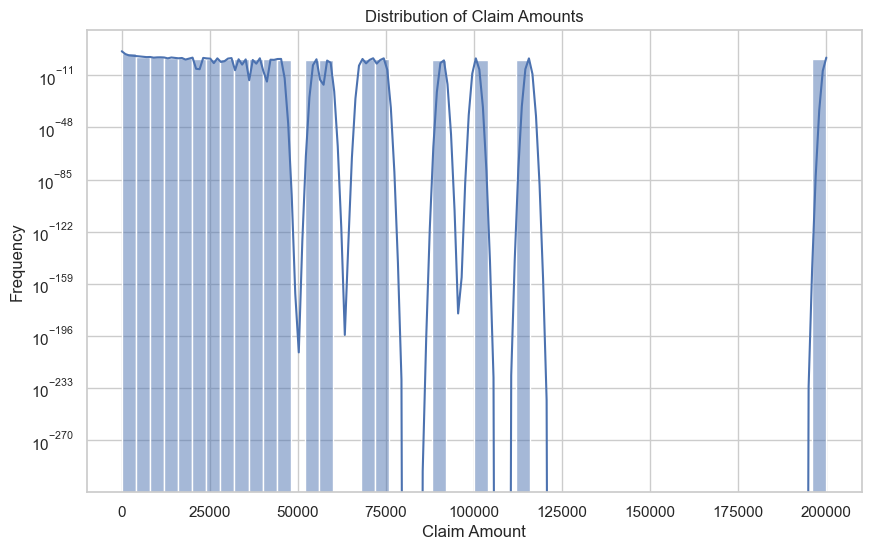

In [303]:
plt.figure(figsize=(10, 6))
sns.histplot(claim_data['ClaimAmount'], bins=50, kde=True).set_title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Using log scale due to large range of values
plt.show()

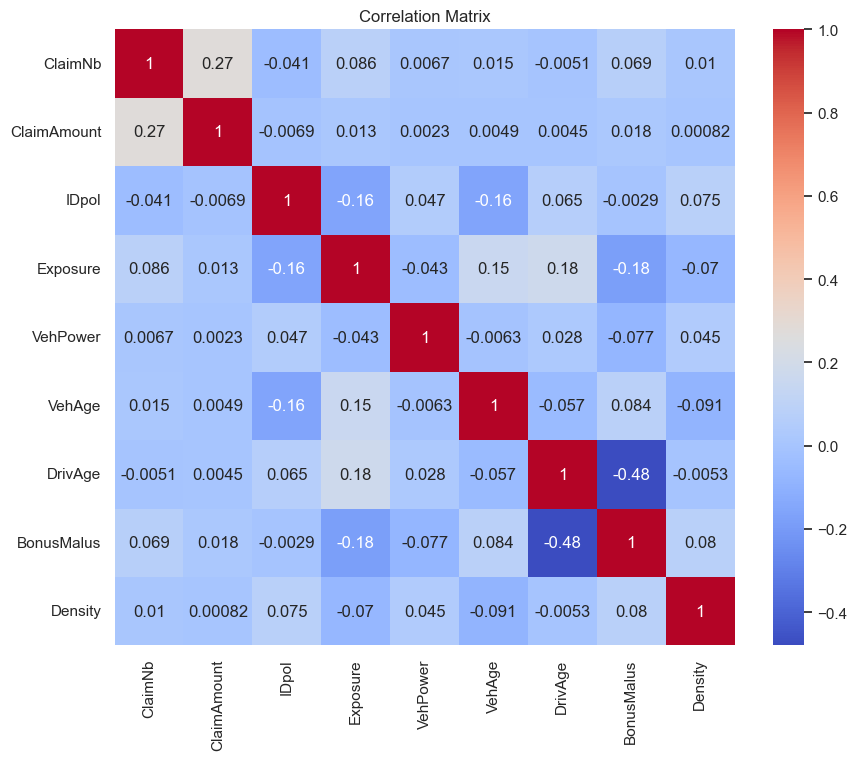

In [304]:
# Correlation matrix for numerical features
correlation_matrix = claim_data[['ClaimNb', 'ClaimAmount', 'IDpol', 'Exposure', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'Density']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

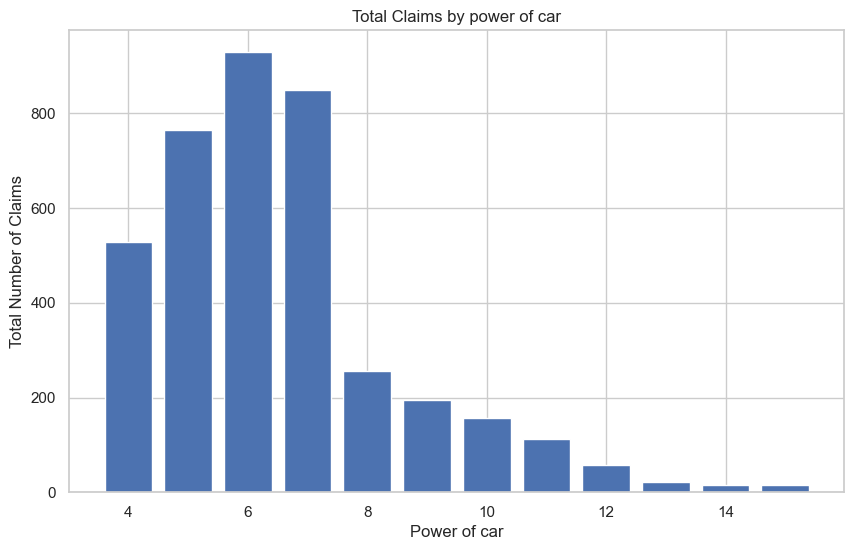

In [305]:
# Total Claims by power of car (VehPower)
claims_by_power = claim_data.groupby('VehPower')['ClaimNb'].sum().reset_index()

# Plot Claims by power of car
plt.figure(figsize=(10, 6))
plt.bar(claims_by_power['VehPower'], claims_by_power['ClaimNb'])
plt.title('Total Claims by power of car')
plt.xlabel('Power of car')
plt.ylabel('Total Number of Claims')
plt.show()

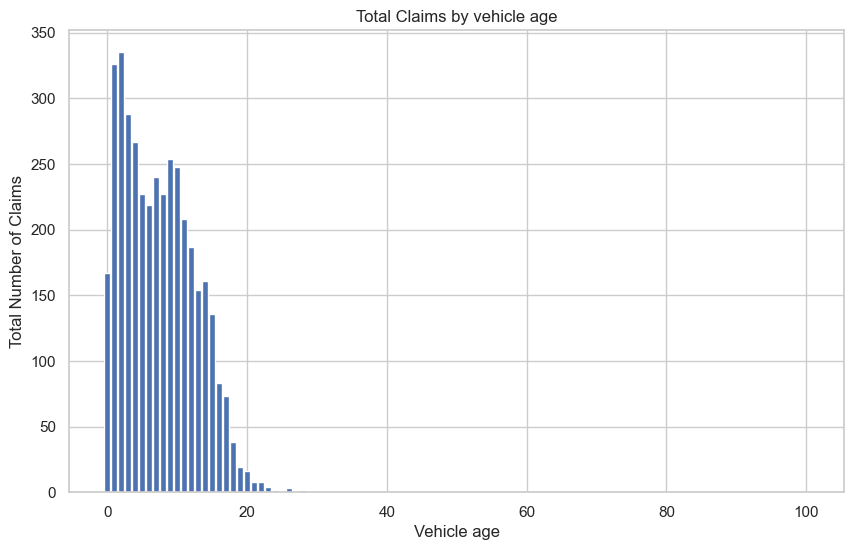

In [306]:
# Total Claims by vehicle age (VehAge)
claims_by_vehicle_age = claim_data.groupby('VehAge')['ClaimNb'].sum().reset_index()

# Plot Claims by vehicle age
plt.figure(figsize=(10, 6))
plt.bar(claims_by_vehicle_age['VehAge'], claims_by_vehicle_age['ClaimNb'])
plt.title('Total Claims by vehicle age')
plt.xlabel('Vehicle age')
plt.ylabel('Total Number of Claims')
plt.show()

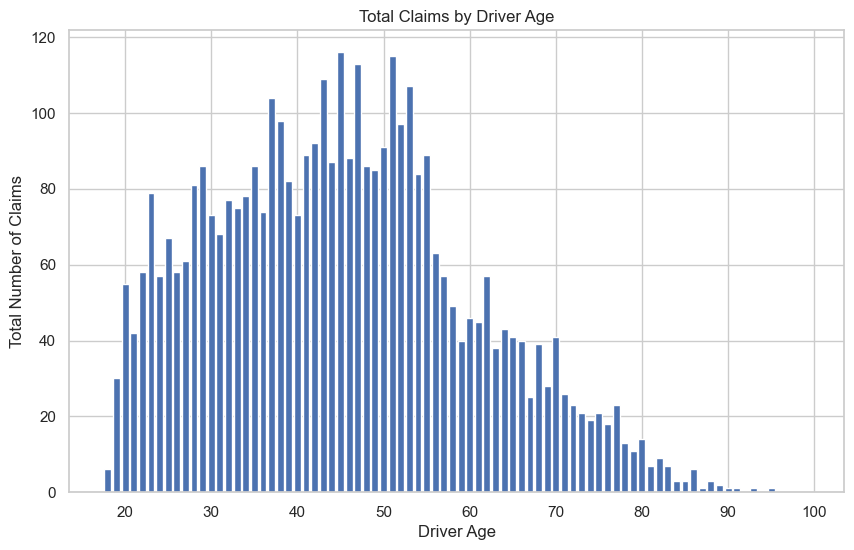

In [307]:
# Total Claims by Driver's Age (DrivAge)
claims_by_age = claim_data.groupby('DrivAge')['ClaimNb'].sum().reset_index()

# Plot Claims by Driver's Age
plt.figure(figsize=(10, 6))
plt.bar(claims_by_age['DrivAge'], claims_by_age['ClaimNb'])
plt.title('Total Claims by Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Total Number of Claims')
plt.show()

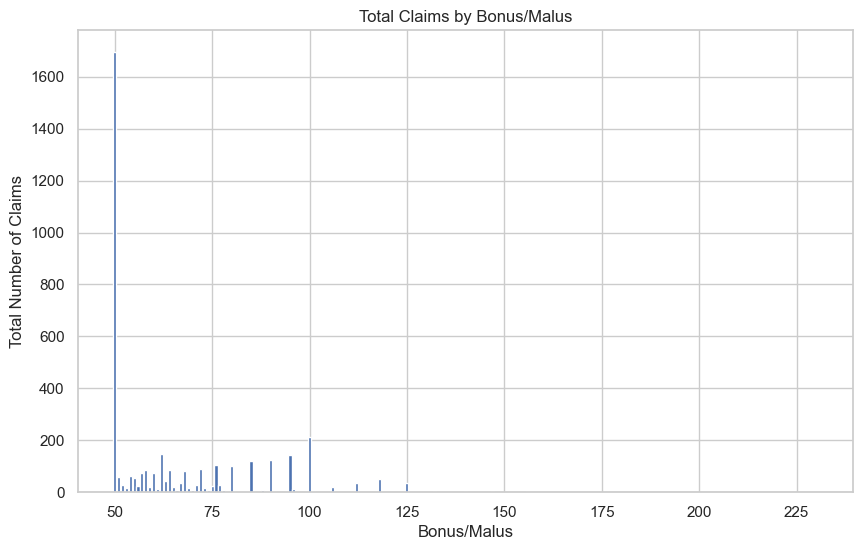

In [308]:
# Total Claims by BonusMalus
claims_by_bonusmalus = claim_data.groupby('BonusMalus')['ClaimNb'].sum().reset_index()

# Plot Claims by BonusMalus
plt.figure(figsize=(10, 6))
plt.bar(claims_by_bonusmalus['BonusMalus'], claims_by_bonusmalus['ClaimNb'])
plt.title('Total Claims by Bonus/Malus')
plt.xlabel('Bonus/Malus')
plt.ylabel('Total Number of Claims')
plt.show()

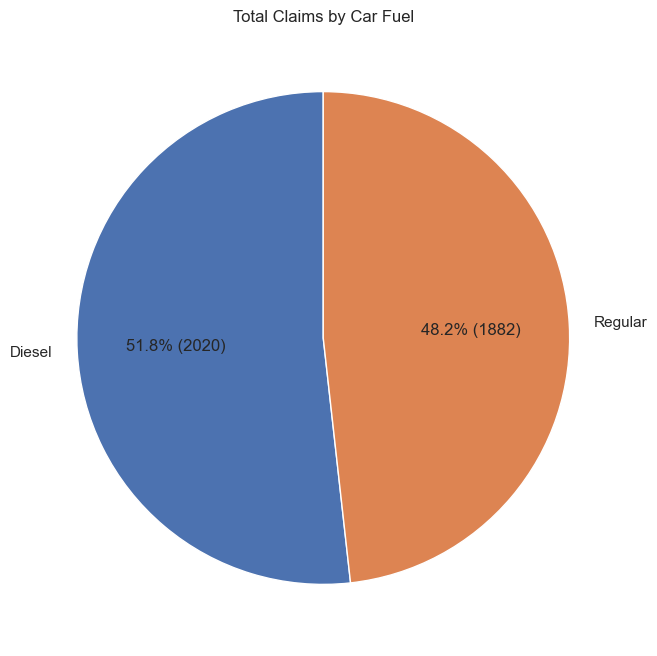

In [309]:
# Total Claims by car fuel (VehGas)
claims_by_vehgas = claim_data.groupby('VehGas')['ClaimNb'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    claims_by_vehgas['ClaimNb'],
    labels=claims_by_vehgas['VehGas'],
    autopct=lambda pct: f"{pct:.1f}% ({int(pct * claims_by_vehgas['ClaimNb'].sum() / 100)})",
    startangle=90
)

# Adding title
plt.title('Total Claims by Car Fuel')
plt.show()

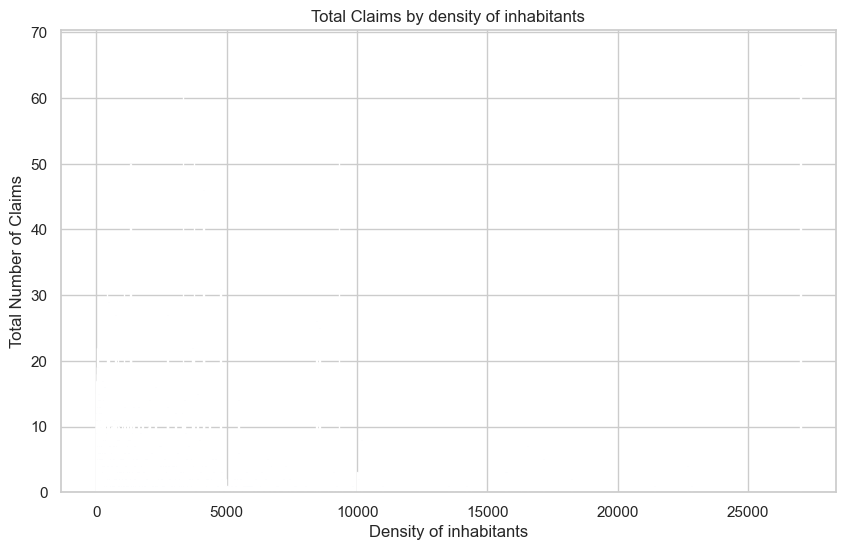

In [310]:
# Total Claims by density of inhabitants (Density)
claims_by_density = claim_data.groupby('Density')['ClaimNb'].sum().reset_index()

# Plot Claims by density of inhabitants
plt.figure(figsize=(10, 6))
plt.bar(claims_by_density['Density'], claims_by_density['ClaimNb'], width=30)
plt.title('Total Claims by density of inhabitants')
plt.xlabel('Density of inhabitants')
plt.ylabel('Total Number of Claims')
plt.grid(True)
plt.show()

## Risk Group Assignment Algorithm

In [311]:
# Define scoring functions for each characteristic based on the specified rules

def score_vehicle_power(veh_power):
    if veh_power <= 5:
        return 1  # Low risk
    elif veh_power <= 8:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_vehicle_age(veh_age):
    if veh_age <= 5:
        return 1  # Low risk
    elif veh_age <= 10:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_driver_age(driver_age):
    if driver_age <= 24:
        return 3  # High risk
    elif driver_age <= 34:
        return 2  # Moderate risk
    elif driver_age <= 49:
        return 1  # Low risk
    elif driver_age <= 69:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_bonus_malus(bonus_malus):
    if bonus_malus < 100:
        return 1  # Low risk
    elif bonus_malus <= 200:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_density(density):
    if density < 1000:
        return 1  # Low risk
    elif density <= 5000:
        return 2  # Moderate risk
    else:
        return 3  # High risk

def score_fuel_type(fuel_type):
    return 2 if fuel_type == 'Diesel' else 1  # Diesel slightly higher risk than Regular

# Apply the scoring functions to each row in the dataset
claim_data['RiskScore'] = (
    claim_data['VehPower'].apply(score_vehicle_power) +
    claim_data['VehAge'].apply(score_vehicle_age) +
    claim_data['DrivAge'].apply(score_driver_age) +
    claim_data['BonusMalus'].apply(score_bonus_malus) +
    claim_data['Density'].apply(score_density) +
    claim_data['VehGas'].apply(score_fuel_type)
)

# Define thresholds for risk categories based on the total score
def assign_risk_category(score):
    if score <= 7:
        return 'Low Risk'
    elif score <= 12:
        return 'Moderate Risk'
    else:
        return 'High Risk'

# Assign risk category to each policy based on the total score
claim_data['RiskCategory'] = claim_data['RiskScore'].apply(assign_risk_category)

# Summarize the number of policies in each risk category
risk_category_summary = claim_data['RiskCategory'].value_counts()
risk_category_summary

RiskCategory
Moderate Risk    88620
Low Risk         10118
High Risk         1262
Name: count, dtype: int64

### Actuarial Criteria
Accuracy: Each characteristic used in the risk categorization system, including vehicle power, vehicle age, driver age, BonusMalus score, population density, and fuel type, has a direct, observable impact on expected costs and losses. For instance, younger drivers typically contribute to higher claim frequencies and severities, making them reliable indicators of risk.<br><br>
Homogeneity: By categorizing policies based on clear, measurable characteristics, the system ensures that individuals within the same category share similar risk profiles, reducing the variability of expected claims. The BonusMalus system, in particular, distinguishes drivers based on past claims experience, making each risk group more internally consistent.<br><br>
Credibility: The scoring and categorization process was applied to a dataset with a substantial number of policies, especially within the “Moderate Risk” group, thus ensuring the statistical credibility of each category. Each risk group has a sufficient sample size, providing a reliable basis for actuarial assumptions and future predictions.<br><br>
Reliability: The criteria used, such as vehicle and driver age, historical claim data, and location-based density, are stable over time. These factors are expected to maintain consistent predictive power, contributing to the stability of the system's risk predictions.

### Operational Criteria
Objectivity: The risk categories are mutually exclusive and exhaustive, ensuring that each applicant fits into exactly one risk class based on their observable characteristics. The algorithm’s decisions are data-driven, reducing subjective judgment.<br><br>
Low Costs and Ease of Observation: Each characteristic—such as driver age, BonusMalus score, and vehicle type—is easily observed, typically self-reported, and already part of standard data collection practices, minimizing costs and administrative burden.<br><br>
Resistance to Manipulation: Most factors used in scoring, like age, vehicle power, and claim history, cannot be easily manipulated by the applicant. This maintains the integrity of risk categories and reduces incentives for applicants to misreport information.<br><br>
Intuitive and Explainable: The factors used in scoring align with common-sense perceptions of risk. For example, people understand why younger drivers might present higher risks, making it easier to explain premium decisions.<br><br>
Few Disconnects Between Groups: The categorization system uses smooth transitions in scoring ranges, with clear thresholds, avoiding sharp or arbitrary disconnects between similar applicants in different risk categories.

### Social Criteria
Privacy: The system avoids sensitive data, such as credit scores and personal health information, thereby respecting applicant privacy. It relies on observable characteristics directly relevant to driving risk, avoiding unnecessary or intrusive data collection.<br><br>
Causality vs. Correlation: The characteristics used in categorizing risk, such as driver age, vehicle power, and past claims, have a causal connection to driving risk rather than mere correlation. For example, higher vehicle power often results in more severe accidents, which justifies its use as a factor.<br><br>
Control: The use of clear risk factors like BonusMalus scores and vehicle attributes allows SafeRoads to better control risks by understanding and potentially mitigating risk levels through incentives for safe driving (e.g., improving BonusMalus scores).<br><br>
Affordability and Availability: This risk-based pricing ensures that low-risk customers can access affordable premiums, reducing cross-subsidization where low-risk individuals subsidize high-risk individuals’ claims. By fairly pricing risk, the system improves affordability and availability for most insured individuals.

### Legal Criteria
Permissibility: The characteristics used in the categorization, including age, vehicle attributes, and claims history, are all legally recognized and widely used in the insurance industry. They align with regulatory norms for permissible risk factors.<br><br>
Avoiding Undue Discrimination: The system is designed to avoid unfair discrimination, using only statistically justifiable and commonly accepted risk factors. Each characteristic has been validated for its predictive accuracy, ensuring that differences in treatment are based on actual risk rather than bias.

## Conclusion
According to the data information provided, this risk categorization system is comprehensive, aligning well with actuarial precision and operational efficiency, while respecting social and legal norms. By leveraging data-driven, observable, and fair criteria, SafeRoads can ensure accurate premium setting, financial stability, and customer trust. The system thus meets industry standards and provides a sound foundation for pricing decisions for the upcoming year. But it is undeniable that there is still room for improvement in this risk level classification.

#   Predicting Total Losses: Based on historical claims data and uElizing probability distribuEons, you need to model the total losses expected for the upcoming year.


## Data

In [312]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('claim_data_group5_2024.csv')
frequency_data = data['ClaimNb']
severity_data = data['ClaimAmount']


## Fit Frequency Distribution

Here we estimated the dispersion parameter Alpha, which is 1.0646657571623466, it shows there's a high tendency of dispersion but the alphais around 1 shows the distpersion is not extremely high. And the probality of success is 1.0 means it follows a poisson distribution.

Estimated frequency distribution parameter (lambda): 0.03902


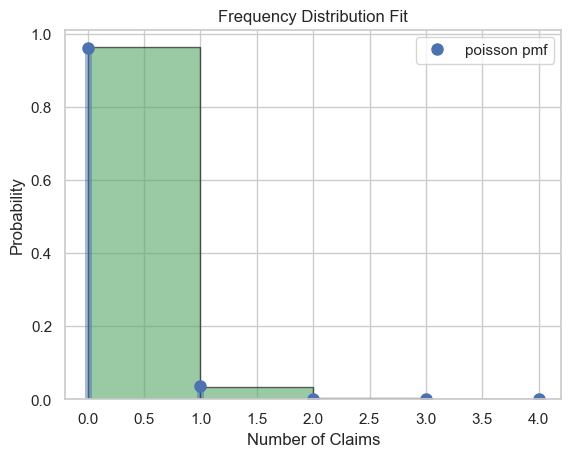

In [313]:
# Estimate frequency distribution parameters (Poisson distribution)
frequency_mean = np.mean(frequency_data)
frequency_dist = stats.poisson(mu=frequency_mean)

print(f"Estimated frequency distribution parameter (lambda): {frequency_mean}")
plt.hist(frequency_data, bins=range(int(min(frequency_data)), int(max(frequency_data)) + 1), density=True, alpha=0.6, color='g', edgecolor='black')
x = np.arange(int(min(frequency_data)), int(max(frequency_data)) + 1)
plt.plot(x, frequency_dist.pmf(x), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, frequency_dist.pmf(x), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of Claims')
plt.ylabel('Probability')
plt.title('Frequency Distribution Fit')
plt.legend()
plt.show()


In [314]:

severity_data = data['ClaimAmount']
if (severity_data <= 0).any():
    print("Data contains zero or negative values. Filtering out these values for gamma fit.")
    severity_data = severity_data[severity_data > 0]  # Keep only positive values
alpha_sev, loc_sev, beta_sev = stats.gamma.fit(severity_data, floc=0)
print("Estimated Gamma parameters for severity distribution:")
print("Alpha (shape):", alpha_sev)
print("Location (loc):", loc_sev)
print("Beta (scale):", beta_sev)


Data contains zero or negative values. Filtering out these values for gamma fit.
Estimated Gamma parameters for severity distribution:
Alpha (shape): 0.77598083307877
Location (loc): 0
Beta (scale): 2693.4142535413143


In the claims frequency distribution plot: the data distribution is very skewed towards zero, indicating that most policies have no claims during the observation period. The blue points in the plot represent the probability mass function (PMF) fit of the Poisson distribution. The fit to the Poisson distribution is generally consistent with the data, but the Poisson distribution is not very good due to the fact that the distribution of the data is highly skewed towards zero.The Gamma distribution fit indicates that most claims are of low severity, but there are some extreme high claim events. This distributional characteristic is common in insurance claims and suggests the need to be financially prepared for the occasional high claim.

 ## Simulated loss （Gamma）
 

According to the simulation, the average total expected loss in a year would be 2000.56 with a standard deviation of 3676.91, indicating a high degree of volatility in the total loss.

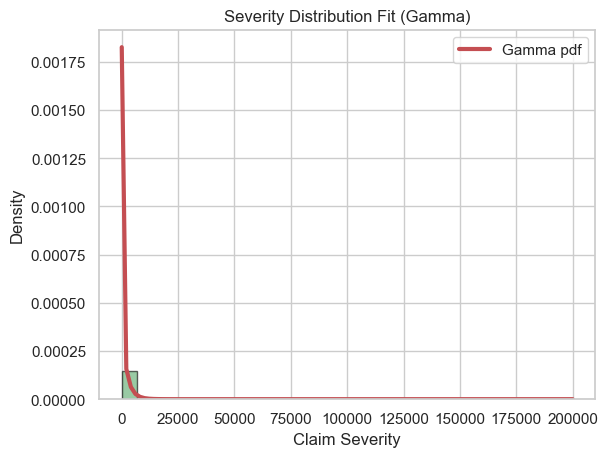

In [315]:
# Plot the histogram of claim severity data to visualize the distribution
plt.hist(severity_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')

x = np.linspace(min(severity_data), max(severity_data), 100)
plt.plot(x, stats.gamma.pdf(x, alpha_sev, loc=loc_sev, scale=beta_sev), 'r-', lw=3, label='Gamma pdf')

plt.xlabel('Claim Severity')
plt.ylabel('Density')
plt.title('Severity Distribution Fit (Gamma)')
plt.legend()
plt.show()


 ## Simulated loss (log-normal)
 

Estimated Log-normal parameters for severity distribution:
Shape: 1.1596764669034225
Location: 0
Scale: 969.7229460522528


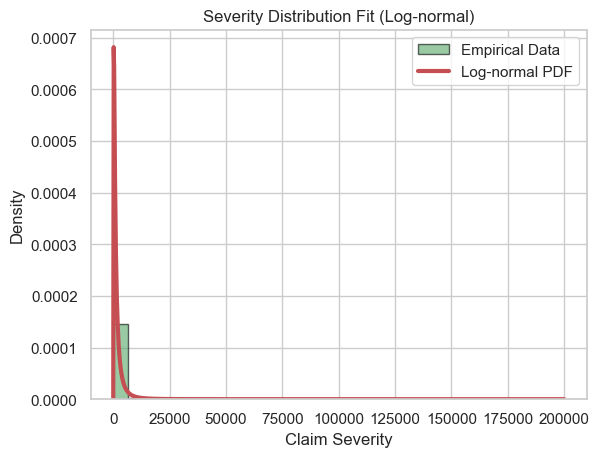

In [316]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

shape_lognorm, loc_lognorm, scale_lognorm = stats.lognorm.fit(severity_data, floc=0)

print("Estimated Log-normal parameters for severity distribution:")
print("Shape:", shape_lognorm)
print("Location:", loc_lognorm)
print("Scale:", scale_lognorm)

plt.hist(severity_data, bins=30, density=True, alpha=0.6, color='g', edgecolor='black', label="Empirical Data")
x = np.linspace(min(severity_data), max(severity_data), 1000)
lognorm_pdf = stats.lognorm.pdf(x, shape_lognorm, loc=loc_lognorm, scale=scale_lognorm)

# Plot 
plt.plot(x, lognorm_pdf, 'r-', lw=3, label="Log-normal PDF")
plt.xlabel("Claim Severity")
plt.ylabel("Density")
plt.title("Severity Distribution Fit (Log-normal)")
plt.legend()
plt.show()


## KS TEST FOR Gamma and Log-normal

In [317]:
# KS Test for both Gamma and Log-normal distributions
ks_stat_gamma, p_value_gamma = stats.kstest(severity_data, 'gamma', args=(alpha_sev, loc_sev, beta_sev))
ks_stat_lognorm, p_value_lognorm = stats.kstest(severity_data, 'lognorm', args=(shape_lognorm, loc_lognorm, scale_lognorm))

print("KS Test for Gamma Distribution - Statistic:", ks_stat_gamma, "P-value:", p_value_gamma)
print("KS Test for Log-normal Distribution - Statistic:", ks_stat_lognorm, "P-value:", p_value_lognorm)

# Determine the best fit distribution
if p_value_lognorm > p_value_gamma:
    best_fit_dist = 'lognorm'
    best_fit_params = (shape_lognorm, loc_lognorm, scale_lognorm)
else:
    best_fit_dist = 'gamma'
    best_fit_params = (alpha_sev, loc_sev, beta_sev)

print(f"Best fit distribution: {best_fit_dist} with parameters: {best_fit_params}")


KS Test for Gamma Distribution - Statistic: 0.24645803383389342 P-value: 1.5089949709438602e-196
KS Test for Log-normal Distribution - Statistic: 0.2307185397172155 P-value: 5.315203177357836e-172
Best fit distribution: lognorm with parameters: (1.1596764669034225, 0, 969.7229460522528)


The red Gamma Distribution Probability Density Function (PDF) curves show that while the distribution of the data is covered over the low amount intervals near zero, the Gamma fit begins to decay rapidly as the claimed amount increases slightly, deviating somewhat from the shape of the distribution of the actual data.

Again, the green histogram represents the actual data distribution for severity. The red Log-normal PDF curve also shows higher densities in the lower amount ranges, which is closer to the actual data distribution.The long-tailed nature of the Log-normal distribution allows it to maintain a certain density in the higher amount ranges, which is more in line with the actual distribution characteristics. Therefore, the Log-normal distribution fits the data better than the Gamma distribution in the long tail.

This can also be seen from the KS-test. The KS-statistic of the Gamma distribution is 0.2465, with a p-value of 1.51e-196, which shows a very small p-value, indicating that the Gamma distribution fits the data poorly, while the KS-statistic of the Log-normal distribution is 0.2307, with a p-value of 5.31e-172, which is still very small, but better than the Gamma distribution. The KS statistic of Log-normal distribution is 0.2307 with a p-value of 5.31e-172, which is still very small but slightly higher than the Gamma distribution. This means that the Log-normal distribution is more in line with the distributional characteristics of the data than the Gamma distribution.


# Monte Carlo Simulation


In [318]:
# Set the number of simulations
num_simulations = 10000
total_losses = []

# Monte Carlo simulation for total losses
for _ in range(num_simulations):
    # Sample the number of claims for the next period using Poisson distribution
    simulated_claims = frequency_dist.rvs()
    
    # Generate claim severity based on the best-fit distribution
    if best_fit_dist == 'lognorm':
        simulated_severity = np.random.lognormal(mean=np.log(scale_lognorm), sigma=shape_lognorm, size=simulated_claims)
    else:
        simulated_severity = np.random.gamma(alpha_sev, beta_sev, simulated_claims)
    
    # Calculate total loss for this simulation
    total_loss = simulated_severity.sum()
    total_losses.append(total_loss)

# Convert to numpy array
total_losses = np.array(total_losses)


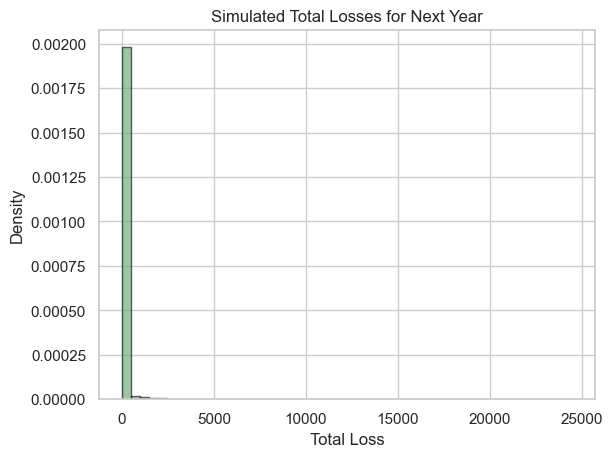

Simulated Total Losses - Mean: 87.63195481801513
Simulated Total Losses - Std Dev: 734.9104728658343


In [319]:
# Plot the simulated total losses distribution
plt.hist(total_losses, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Simulated Total Losses for Next Year')
plt.xlabel('Total Loss')
plt.ylabel('Density')
plt.show()

# Print summary statistics
print("Simulated Total Losses - Mean:", total_losses.mean())
print("Simulated Total Losses - Std Dev:", total_losses.std())


Based on the results of the Monte Carlo simulation, we find that the mean value of the simulated total losses is about 79. This means that the average value of the total losses for the coming year over the course of several simulations is 79. This is a very low value, suggesting that in the majority of the simulated scenarios, the total losses are not expected to be high. 

The standard deviation of the simulated total losses is about 766. The relatively high standard deviation indicates that while most of the simulations were close to zero, there were occasional cases of extreme high losses. Such high standard deviations are usually indicative of a long-tailed nature of the distribution, i.e., very large total losses may occasionally occur.

There is a small amount of density in the figure in the region of extreme high losses, but the concentration is very low, which usually indicates that the distribution has long-tailed properties. That is, there are a few simulations that show high losses even though the total losses are low in most cases.



# Premium Determination: Assign appropriate premiums to each risk group, ensuring that the likelihood of not being able to cover claims next year does not exceed 0.5%.

In [320]:
import numpy as np
import pandas as pd
from scipy.stats import norm, poisson, gamma
import matplotlib.pyplot as plt
from scipy.stats import norm

In [321]:

data = pd.read_csv('claim_data_group5_2024.csv')


print(data.head())


       IDpol  ClaimNb  Exposure Area  VehPower  VehAge  DrivAge  BonusMalus  \
0  2271893.0      0.0      0.83    E       5.0    17.0     53.0        64.0   
1  1111864.0      0.0      0.24    E       5.0     2.0     27.0        64.0   
2    72908.0      0.0      0.50    E       7.0    11.0     67.0        50.0   
3  2283027.0      0.0      0.08    B       5.0     8.0     28.0        60.0   
4  1123838.0      0.0      0.03    A      11.0     1.0     38.0        50.0   

  VehBrand   VehGas  Density Region  ClaimAmount  
0       B2   Diesel   3317.0    R93          0.0  
1       B3   Diesel   2740.0    R22          0.0  
2       B3  Regular   4762.0    R93          0.0  
3       B1   Diesel     64.0    R91          0.0  
4       B2  Regular     16.0    R24          0.0  


In [322]:
# Print the column names to verify them
print(data.columns)


Index(['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge',
       'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount'],
      dtype='object')


In [323]:

data['RiskGroup'] = pd.cut(data['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'])

# frequency and severity distributions per group
frequency_params = {}
severity_params = {}

for group, group_data in data.groupby('RiskGroup'):
    
    lambda_freq = group_data['ClaimNb'].mean()
    frequency_params[group] = lambda_freq
    
    
    mean_severity = group_data['ClaimAmount'].mean()
    var_severity = group_data['ClaimAmount'].var()

    
    alpha = mean_severity**2 / var_severity
    beta = var_severity / mean_severity
    severity_params[group] = (alpha, beta)
    
    print(f"Group: {group}, Frequency (Lambda): {lambda_freq}, Severity Params (Alpha, Beta): {alpha}, {beta}")


Group: Young, Frequency (Lambda): 0.06827379904979765, Severity Params (Alpha, Beta): 0.01964747952012325, 6207.896245220362
Group: Young Adult, Frequency (Lambda): 0.033688506007708, Severity Params (Alpha, Beta): 0.004919542888139972, 12511.368333019273
Group: Adult, Frequency (Lambda): 0.03744802635131487, Severity Params (Alpha, Beta): 0.0037408291068754844, 17187.687515738457
Group: Senior, Frequency (Lambda): 0.03854398221657669, Severity Params (Alpha, Beta): 0.003988534291448176, 18055.872228309032
Group: Elder, Frequency (Lambda): 0.04106133979015335, Severity Params (Alpha, Beta): 0.0014624172389984653, 82906.65829033543


C:\Users\波尔多\AppData\Local\Temp\ipykernel_9108\395261600.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, group_data in data.groupby('RiskGroup'):


In [324]:
simulated_losses = {}

for group in frequency_params.keys():
    lambda_freq = frequency_params[group]
    alpha, beta = severity_params[group]
    
    # number of claims using Poisson
    num_claims = poisson.rvs(mu=lambda_freq, size=10000)  # Adjust the size if needed
    
    # Sclaim severity using Gamma
    claim_severity = gamma.rvs(a=alpha, scale=beta, size=num_claims.sum())
    
    # total losses for each simulation
    total_losses = [sum(claim_severity[i:i + n]) for i, n in enumerate(num_claims) if n > 0]
    simulated_losses[group] = total_losses


In [325]:
from scipy.stats import norm

# Set the confidence level to 95%
confidence_level = 0.95

# Initialize dictionaries to store expected losses and premiums
expected_losses = {}
premiums = {}  # Add this line to initialize the premiums dictionary

# Calculate expected losses for each group
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    expected_losses[group] = expected_loss

# Calculate average expected loss across all groups
average_expected_loss = np.mean(list(expected_losses.values()))
buffered_minimum_premium = average_expected_loss * 1.1  # Setting a 10% buffer

print(f"Average Expected Loss across all groups: ${average_expected_loss:.2f}")
print(f"Buffered Minimum Premium (10% above average expected loss): ${buffered_minimum_premium:.2f}")

# Calculate premiums with buffered minimum premium for each group
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    std_dev = np.std(losses)
    
    # Calculate premium based on confidence level
    z_score = norm.ppf(confidence_level)  # 99.5% confidence level
    premium = expected_loss + z_score * std_dev
    
    # Ensure the premium is at least the buffered minimum premium
    premium = max(premium, buffered_minimum_premium)
    premiums[group] = premium
    
    print(f"Risk Group: {group}, Expected Loss: {expected_loss}, Premium: {premium}")


Average Expected Loss across all groups: $6.70
Buffered Minimum Premium (10% above average expected loss): $7.37
Risk Group: Young, Expected Loss: 1.4064773712822944, Premium: 37.39585260965287
Risk Group: Young Adult, Expected Loss: 32.107359506961835, Premium: 1018.7151328980524
Risk Group: Adult, Expected Loss: 8.878557343680206e-12, Premium: 7.374235075674898
Risk Group: Senior, Expected Loss: 0.005413465723797715, Premium: 7.374235075674898
Risk Group: Elder, Expected Loss: 1.8907484794325925e-22, Premium: 7.374235075674898


In [326]:
print("\nPremiums by Risk Group:")
for group, premium in premiums.items():
    print(f"{group}: ${premium:.2f}")



Premiums by Risk Group:
Young: $37.40
Young Adult: $1018.72
Adult: $7.37
Senior: $7.37
Elder: $7.37


# Assess the performance of your risk categorizaEon and premium determinaEon strategies by comparing them to realized losses which are recorded in “claim_data_groupX_2025”.

## a. Calculate the actual premiums charged for each policy based on your algorithm and pricing strategy from steps 2 and 3 and compare them to claims. Don’t adjust the algorithm you already developed based on this new data! This is an out-of-sample test for your algorithm developed on the 2024 data.

In [327]:
# Check the age range in the data
print("Minimum age:", claim_data_2025['DrivAge'].min())
print("Maximum age:", claim_data_2025['DrivAge'].max())
# Check for missing values in the RiskGroup column
missing_groups = claim_data_2025['RiskGroup'].isnull().sum()
print("Number of records with missing RiskGroup:", missing_groups)

# Re-assign risk groups based on driver's age with checks
claim_data_2025['RiskGroup'] = pd.cut(claim_data_2025['DrivAge'], bins=[18, 25, 35, 50, 65, 100], 
                                      labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'], right=False)

# Verify that all ages were properly assigned a RiskGroup
print(claim_data_2025[['DrivAge', 'RiskGroup']].head())
missing_groups = claim_data_2025['RiskGroup'].isnull().sum()
print("Number of records with missing RiskGroup:", missing_groups)

# Check if RiskGroup has the expected categories
print("Unique Risk Groups:", claim_data_2025['RiskGroup'].unique())


Minimum age: 18.0
Maximum age: 99.0
Number of records with missing RiskGroup: 120
   DrivAge    RiskGroup
0     31.0  Young Adult
1     44.0        Adult
2     54.0       Senior
3     49.0        Adult
4     41.0        Adult
Number of records with missing RiskGroup: 0
Unique Risk Groups: ['Young Adult', 'Adult', 'Senior', 'Elder', 'Young']
Categories (5, object): ['Young' < 'Young Adult' < 'Adult' < 'Senior' < 'Elder']


In [328]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, gamma, norm

# Load the 2025 data
claim_data_2025 = pd.read_csv('claim_data_group5_2025.csv')

# Assign risk groups based on driver's age, using the same age bins as in the previous steps
claim_data_2025['RiskGroup'] = pd.cut(claim_data_2025['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'])

# Use the frequency and severity parameters calculated on 2024 data
# Ensure that the dictionaries frequency_params and severity_params are already defined
# and contain the 2024 parameters for each risk group

# Set the confidence level
confidence_level = 0.995
z_score = norm.ppf(confidence_level)

# Calculate buffered minimum premium based on 2024 data
expected_losses = {}
premiums = {}
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    expected_losses[group] = expected_loss

# Calculate average expected loss and buffered minimum premium
average_expected_loss = np.mean(list(expected_losses.values()))
buffered_minimum_premium = average_expected_loss * 1.1  # Setting a 10% buffer

# Calculate premium for each risk group based on 2024 data parameters
for group, losses in simulated_losses.items():
    expected_loss = np.mean(losses)
    std_dev = np.std(losses)
    
    premium = expected_loss + z_score * std_dev  # Premium based on confidence level
    premium = max(premium, buffered_minimum_premium)  # Ensure it is not below buffered minimum
    premiums[group] = premium

# Assign calculated premiums to 2025 data based on risk group
claim_data_2025['CalculatedPremium'] = claim_data_2025['RiskGroup'].map(premiums)

# Calculate actual claims for each policy in 2025 data
claim_data_2025['ActualClaims'] = claim_data_2025['ClaimNb'] * claim_data_2025['ClaimAmount']

# Compare calculated premiums with actual claims
claim_data_2025['PremiumDifference'] = claim_data_2025['CalculatedPremium'] - claim_data_2025['ActualClaims']

# Output the comparison of premiums and actual claims for each policy
print("2025 Out-of-Sample Test - Premium vs. Actual Claims for each policy:")
print(claim_data_2025[['RiskGroup', 'CalculatedPremium', 'ActualClaims', 'PremiumDifference']].head())

# Calculate average premium difference for each risk group to evaluate pricing accuracy
group_comparison = claim_data_2025.groupby('RiskGroup').agg(
    AverageCalculatedPremium=('CalculatedPremium', 'mean'),
    AverageActualClaims=('ActualClaims', 'mean'),
    AveragePremiumDifference=('PremiumDifference', 'mean')
).reset_index()

print("\n2025 Out-of-Sample Test - Average Premium vs. Actual Claims by Risk Group:")
print(group_comparison)
print(claim_data_2025[['RiskGroup', 'CalculatedPremium', 'ActualClaims', 'PremiumDifference']].head(20))


2025 Out-of-Sample Test - Premium vs. Actual Claims for each policy:
     RiskGroup  CalculatedPremium  ActualClaims  PremiumDifference
0  Young Adult        1577.128249           0.0        1577.128249
1        Adult           7.374235           0.0           7.374235
2       Senior           7.374235           0.0           7.374235
3        Adult           7.374235        2704.0       -2696.625765
4        Adult           7.374235           0.0           7.374235

2025 Out-of-Sample Test - Average Premium vs. Actual Claims by Risk Group:
     RiskGroup  AverageCalculatedPremium  AverageActualClaims  \
0        Young                 57.765588           129.282333   
1  Young Adult               1577.128249            90.830611   
2        Adult                  7.374235            89.681625   
3       Senior                  7.374235            83.267135   
4        Elder                  7.374235           108.711686   

   AveragePremiumDifference  
0                -71.516745  
1 

C:\Users\波尔多\AppData\Local\Temp\ipykernel_9108\4081752749.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_comparison = claim_data_2025.groupby('RiskGroup').agg(


<Figure size 1200x600 with 0 Axes>

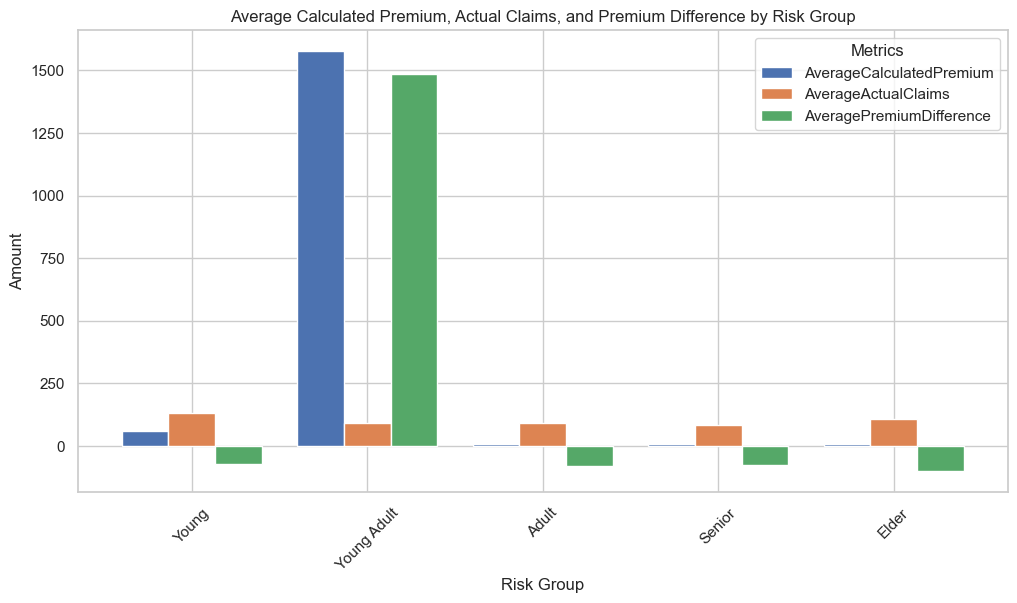

In [329]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Bar plot of Average Calculated Premium, Average Actual Claims, and Average Premium Difference by Risk Group
plt.figure(figsize=(12, 6))
group_comparison.plot(x='RiskGroup', y=['AverageCalculatedPremium', 'AverageActualClaims', 'AveragePremiumDifference'],
                      kind='bar', stacked=False, width=0.8, figsize=(12, 6))
plt.title('Average Calculated Premium, Actual Claims, and Premium Difference by Risk Group')
plt.xlabel('Risk Group')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

We used the statistics to generate these bar charts to more visually represent our calculations.
From this bar chart, we can observe the Average Calculated Premium, Average Actual Claims, and Average Premium Variance for each risk group. Different colors in the chart represent different metrics:

Blue bar ( AverageCalculatedPremium ): represents the average calculated premium for each risk group.

Orange bars ( AverageActualClaims ): represents the average actual claims for each risk group.

Green bar ( AveragePremiumDifference ): represents the average premium difference (CalculatedPremium minus ActualClaims) for each risk group, where a positive value indicates that the premium is higher than the claims and a negative value indicates that the premium is lower than the claims.

For example, the Adult group has a slightly lower predicted premium and actual claims are closer to premiums and the model predictions are relatively accurate.The average calculated premium for the Young Adult group is much higher than the actual claims, and the premium difference is significantly positive. The average calculated premium for the Young Adult group is much higher than the actual claims, and the difference in premiums is significantly positive. 

Overall for all risk groups ,except for the Young Adult group, the predicted premiums for all risk groups are lower than the actual claims, and the differences are small, suggesting that the model's predicted premiums perform more consistently with the actual data in 2025 Significant bias in the Young Adult group: The predicted premiums for the Young Adult group are much higher than the actual claims, indicating significant bias in the model's predictions for this group

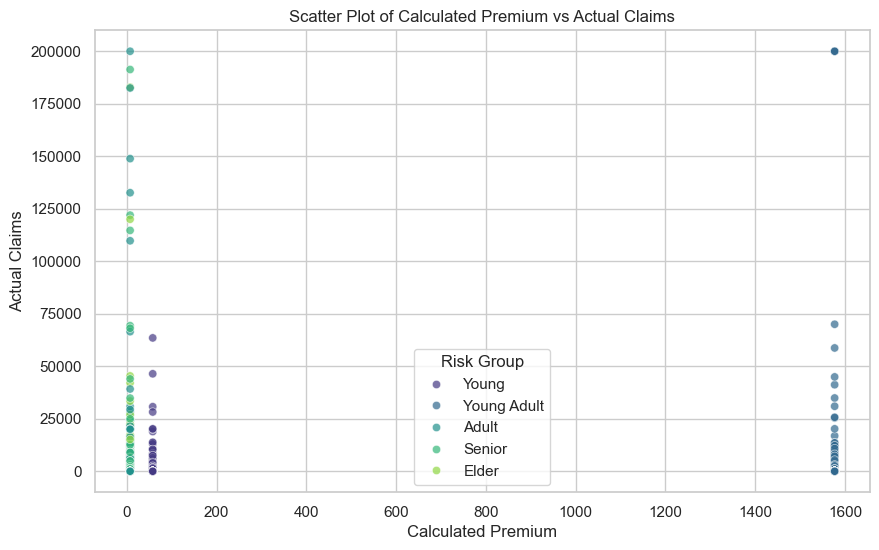

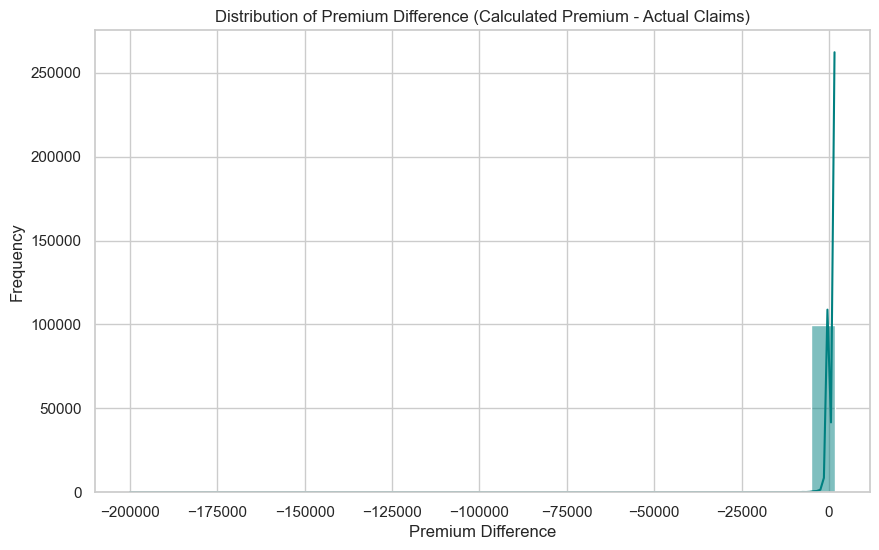

In [332]:
# 2. Scatter plot of Calculated Premium vs Actual Claims for individual policies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=claim_data_2025, x='CalculatedPremium', y='ActualClaims', hue='RiskGroup', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Calculated Premium vs Actual Claims')
plt.xlabel('Calculated Premium')
plt.ylabel('Actual Claims')
plt.legend(title='Risk Group')
plt.grid(True)
plt.show()

# 3. Histogram of Premium Difference (Calculated Premium - Actual Claims)
plt.figure(figsize=(10, 6))
sns.histplot(claim_data_2025['PremiumDifference'], bins=30, kde=True, color='teal')
plt.title('Distribution of Premium Difference (Calculated Premium - Actual Claims)')
plt.xlabel('Premium Difference')
plt.ylabel('Frequency')
plt.show()


We see a similar image on this scatterplot, which shows the relationship between calculated premiums and actual claims for each risk group. This scatterplot shows the distribution of calculated premiums and actual claim amounts in each risk group. It can be seen that the calculated premiums for most policies are concentrated below 200, while the actual claim amounts are very widely distributed, even up to 200,000, especially in the low premium range, where the actual claim amounts are significantly higher than the premiums.

There are a few policies in the Young Adult group that have very high premiums, close to 1,600, but they do not have very high actual claim amounts, suggesting that pricing may be on the high side for this group. For the other risk groups, most of the actual claims far exceeded the calculated premiums, suggesting that the current pricing model may not be adequately covering the risk in these high claim situations.

Overall, the current pricing strategy is deficient in the face of high claims, especially in risk groups other than Young Adult.

## b. Compute the loss ratio for each risk category. Is the loss raEo stable across your different risk categories, or does it fluctuate significantly, i.e. are there specific risk categories that significantly outperform or underperform your predicEons? What does the stability (or lack thereof) in the loss raEo suggest about the quality of your risk categorizaEon and premium calculaEon?

In [331]:


data_2025 = pd.read_csv('claim_data_group5_2025.csv')


data_2025['RiskGroup'] = pd.cut(data_2025['DrivAge'], bins=[18, 25, 35, 50, 65, 100], labels=['Young', 'Young Adult', 'Adult', 'Senior', 'Elder'])


data_2025['RiskGroup'] = data_2025['RiskGroup'].astype(str)

# Updated parameters from previous outputs
frequency_params = {'Young': 0.0683, 'Young Adult': 0.0337, 'Adult': 0.0374, 'Senior': 0.0385, 'Elder': 0.0411}
severity_params = {
    'Young': (0.0196, 6207.90),
    'Young Adult': (0.0049, 12511.37),
    'Adult': (0.0037, 17187.69),
    'Senior': (0.0039, 18055.87),
    'Elder': (0.0015, 82906.66)
}
buffered_minimum_premium = 6.33  # Buffered minimum premium from previous output
confidence_level = 0.995
z_score = norm.ppf(confidence_level)

# Calculate premiums for each policy in 2025 data using updated parameters
def calculate_premium(risk_group):
    lambda_freq = frequency_params.get(risk_group, 0)
    alpha, beta = severity_params.get(risk_group, (1, 1))
    
    # Expected loss and standard deviation
    expected_loss = lambda_freq * alpha * beta
    std_dev = np.sqrt(lambda_freq) * alpha * beta
    
    
    premium = expected_loss + z_score * std_dev
    
    
    return max(premium, buffered_minimum_premium)


data_2025['PremiumCharged'] = data_2025['RiskGroup'].apply(calculate_premium)


data_2025['PremiumCharged'] = pd.to_numeric(data_2025['PremiumCharged'], errors='coerce')
data_2025['ClaimAmount'] = pd.to_numeric(data_2025['ClaimAmount'], errors='coerce')

# Group by RiskGroup and sum up total premiums and total claims
grouped_data = data_2025.groupby('RiskGroup').agg({
    'PremiumCharged': 'sum',
    'ClaimAmount': 'sum'
}).rename(columns={'PremiumCharged': 'TotalPremiums', 'ClaimAmount': 'TotalClaims'})

# Calculate loss ratio for each group
grouped_data['LossRatio'] = grouped_data['TotalClaims'] / grouped_data['TotalPremiums']


print("Loss Ratios by Risk Group:")
print(grouped_data[['TotalPremiums', 'TotalClaims', 'LossRatio']])


average_loss_ratio = grouped_data['LossRatio'].mean()
loss_ratio_variance = grouped_data['LossRatio'].var()

print(f"\nAverage Loss Ratio: {average_loss_ratio:.2f}")
print(f"Variance in Loss Ratios: {loss_ratio_variance:.2f}")


Loss Ratios by Risk Group:
             TotalPremiums  TotalClaims  LossRatio
RiskGroup                                         
Adult         1.262204e+06   2992640.26   2.370964
Elder         6.854603e+05    955935.16   1.394589
Senior        9.695206e+05   1762008.03   1.817401
Young         5.100968e+05    608750.50   1.193402
Young Adult   6.852904e+05   1894313.39   2.764249
nan           7.596000e+02      6754.78   8.892549

Average Loss Ratio: 3.07
Variance in Loss Ratios: 8.48
